<a href="https://colab.research.google.com/github/dfirm/iads_day5/blob/main/Practical_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# packages
!pip install lime
!pip install graphviz
!pip install pydotplus

     |████████████████████████████████| 275 kB 7.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=ca18de8be4d51c963b12d67798e2825c29a160441b6d690323d0302cfa6c01aa
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [3]:
# imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler  

from IPython.display import Image  
import pydotplus

from collections import Counter
import pandas as pd
import numpy as np

import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Decision Tree

In [4]:
d = load_iris()
data = pd.DataFrame(data=d.data, columns=d.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
labels = [d.target_names[v] for v in d.target]
Counter(labels)

Counter({'setosa': 50, 'versicolor': 50, 'virginica': 50})

In [6]:
col_names = d.feature_names
col_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# **Practical 1**

## Decision Tree

In [7]:
# TODO: split the dataset into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(d.data, d.target, test_size=0.3, random_state=1)


In [9]:
# TODO: implement a DecisionTreeClassifier (check its documentation page from sklearn)

In [10]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,y_train)

In [11]:
# TODO: compute model accuracy on the testing set

In [12]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9555555555555556

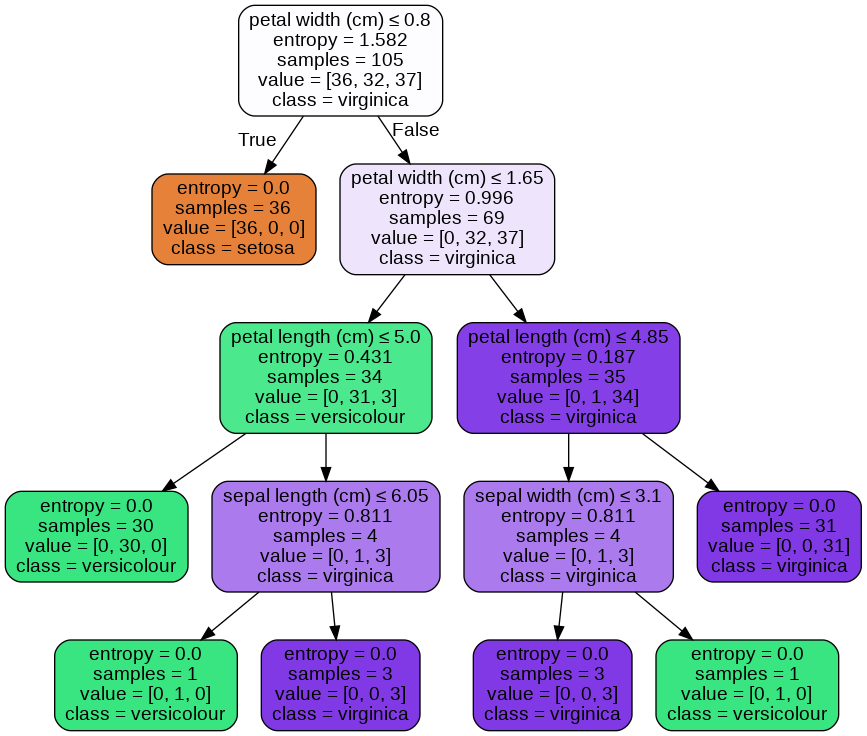

In [13]:
# visualise the tree
# clf is the classifier - replace with the variable name of your classifier
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names, 
                class_names=['setosa', 'versicolour', 'virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

# **Practical 2**

## SVM

In [14]:
# implement SVM (check documentation of SVC from sklearn)

In [70]:
train,test,labels_train, labels_test = train_test_split(d.data,d.target,train_size=0.8)
svc_clf = SVC(C=0.6,probability=True, random_state=1)
svc_clf.fit(train,labels_train)

SVC(C=0.6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [72]:
y_pred = svc_clf.predict(test)
accuracy_score(labels_test,y_pred)*100

100.0

## Feature pertubation

In [78]:
# select an instance 
i = 10

# make a copy of the existing data point so we can modify it without altering our data
temp = X_train[i].copy()

# get the indices of the features: sepal length (cm);	sepal width (cm);	petal length (cm);	petal width (cm)
feature_index = lambda x: d.feature_names.index(x)

In [85]:
temp = X_train[i].copy()
print('Increasing petal width')
print('P(setosa) before:', svc_clf.predict_proba(temp.reshape(1,-1))[0,0])
# TODO: set some value to the petal width feature
temp[feature_index('petal width (cm)')] = 3.3
# TODO: print the SVM's prediction of the new instance
print('P(setosa) after:', svc_clf.predict_proba(temp.reshape(1,-1))[0,0])

Increasing petal width
P(setosa) before: 0.009646009233835776
P(setosa) after: 0.009646009233835776


In [86]:
temp = X_train[i].copy()
print('Increasing petal length')
# TODO: do the same but for petal length feature
print('P(setosa) before:', svc_clf.predict_proba(temp.reshape(1,-1))[0,0])
temp[feature_index('petal length (cm)')] = 3.3
print('P(setosa) after:', svc_clf.predict_proba(temp.reshape(1,-1))[0,0])

Increasing petal length
P(setosa) before: 0.009646009233835776
P(setosa) after: 0.041865279944580315


In [90]:
print('Increasing both')
# TODO: do the same but for both features: petal width and petal length
temp = X_train[i].copy()
print('Increasing petal length')
# TODO: do the same but for petal length feature
print('P(setosa) before:', svc_clf.predict_proba(temp.reshape(1,-1))[0,0])
temp[feature_index('petal length (cm)')] = 3.3
temp[feature_index('petal width (cm)')] = 3.3
print('P(setosa) after:', svc_clf.predict_proba(temp.reshape(1,-1))[0,0])

Increasing both
Increasing petal length
P(setosa) before: 0.007520805670735315
P(setosa) after: 0.041865279944580315


In [92]:
# the above can be done simply by passing in a point, predicting its class, and the modifying it
# this will predict probabilities for each class
# TODO: use SVM to predict probabilites of several, manually created datapoints
print(svc_clf.predict_proba(np.array([1.5,0.4,0.3,1.7]).reshape(1,-1)))
print(svc_clf.predict_proba(np.array([10.5,0.4,0.3,1.7]).reshape(1,-1)))


[[0.56249278 0.2270159  0.21049132]]
[[0.38381759 0.39470909 0.22147332]]


# **Practical 5**

In [94]:
# TODO: use LimeTabularExplainer to explain predictions
exp = 

NameError: ignored

In [93]:
# exp is the explained instance
exp.show_in_notebook(show_table=True, show_all=False) # show_all=False means we display only the features used in explanations

NameError: ignored